# **Statistical Tests for Gold Price Analysis**

# **1. Time Series Analysis Tests**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df=pd.read_excel('dataset .xlsx',parse_dates=['Date'], index_col='Date')

In [ ]:
df.columns

Index(['CPI_Actual', 'USD_INR_Price', 'USD_INR_Change %', 'crude_Price',
       'crude_Change %', 'gold_Price', 'gold_Vol.', 'gold_Change %',
       'bond_Price', 'bond_Change %', 'nifty_Price', 'nifty_Vol.',
       'nifty_Change %', 'Repo_Rate', 'Inflation Rate (%)', 'Holiday Name',
       'GPR', 'GPRC_IND', 'US_Price', 'US_Change %', 'BSE_Price', 'BSE_Vol.',
       'BSE_Change %', 'US_federal_target_rate_Actual', 'MCX_Price',
       'MCX_Change %', 'WPI_Actual', 'Silver_Price', 'Silver_Change %',
       'india_vix_Price'],
      dtype='object')

## **1.1 Stationarity Tests**

- Augmented Dickey-Fuller (ADF) test: Tests for the presence of a unit root in the time series.
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test: Tests for stationarity.

In [ ]:
# ADF Test
result = adfuller(df['gold_Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# KPSS Test
result = kpss(df['gold_Price'])
print('KPSS Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.0869645687929932
p-value: 0.9951038205772254
KPSS Statistic: 9.079785242376447
p-value: 0.01


<ipython-input-12-f954a91ab28d>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['gold_Price'])


**Stationarity Tests:**

- **ADF Test:** The high p-value (0.9951) suggests the series is non-stationary.
- **KPSS Test:** The low p-value (0.01) also indicates non-stationarity.
This non-stationarity implies that gold prices have a trend and do not return to a long-run mean, making forecasting more challenging.

## **1.2 Seasonality and Trend Tests**

- **Seasonal Decomposition:** Decomposes the time series into trend, seasonal, and residual components.

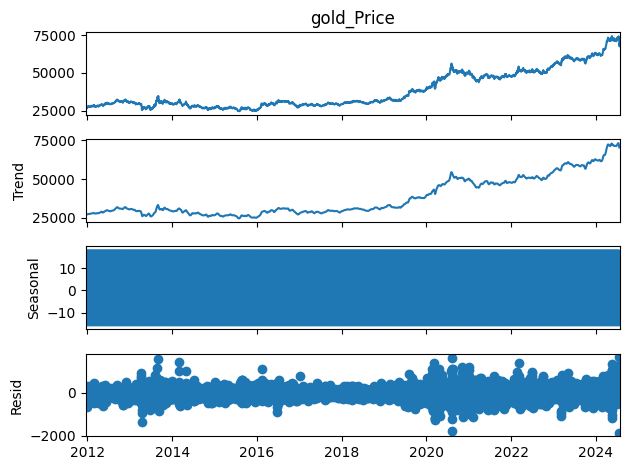

In [ ]:
result = seasonal_decompose(df['gold_Price'], model='additive', period=12)
result.plot()
plt.show()

**Gold Price Trend:**

The trend component shows a steady increase in gold prices over time, with a sharp rise from 2019 onwards.
This suggests a long-term bullish trend in the Indian gold market.


**Seasonality:**

The seasonal component appears relatively constant, indicating minimal seasonal effects on gold prices in India.
This suggests that gold prices are not significantly influenced by regular seasonal patterns.


**Residuals:**

The residual plot shows some outliers, particularly around 2012-2013 and 2020.
These outliers might represent unexpected market shocks or events affecting gold prices.

# **2. Correlation and Regression Analysis**


## **2.1 Correlation Tests**
- Pearson Correlation: Measures linear correlation between variables.
- Spearman Rank Correlation: Measures monotonic relationships (including non-linear).
- Kendall's Tau: Another measure of ordinal association.

In [ ]:

# Pearson Correlation
pearson_corr, p_value = stats.pearsonr(df['gold_Price'], df['crude_Price'])
print('Pearson Correlation:', pearson_corr)
print('P-value:', p_value)

# Spearman Correlation
spearman_corr, p_value = stats.spearmanr(df['gold_Price'], df['crude_Price'])
print('Spearman Correlation:', spearman_corr)
print('P-value:', p_value)

# Kendall's Tau
kendall_tau, p_value = stats.kendalltau(df['gold_Price'], df['crude_Price'])
print('Kendalls Tau:', kendall_tau)
print('P-value:', p_value)

Pearson Correlation: 0.10977264117359996
P-value: 7.93634701294989e-14
Spearman Correlation: 0.1157972123411269
P-value: 3.1675018984115567e-15
Kendalls Tau: 0.08813445096272055
P-value: 2.987398626475032e-19


Weak positive correlations (Pearson: 0.11, Spearman: 0.12) between gold and crude oil prices.
This suggests a slight tendency for gold prices to increase with oil prices, but the relationship is not strong.

## **2.2 Regression Analysis**

- Simple Linear Regression: For analyzing the relationship between gold price and individual variables.
- Multiple Linear Regression: For analyzing the combined effect of multiple variables on gold price.

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df['crude_Price'])
model = sm.OLS(df['gold_Price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             gold_Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     56.17
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           7.94e-14
Time:                        16:01:31   Log-Likelihood:                -49970.
No. Observations:                4607   AIC:                         9.994e+04
Df Residuals:                    4605   BIC:                         9.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.387e+04    607.253     55.784      

In [ ]:
price_vars = ['CPI_Actual', 'USD_INR_Price', 'crude_Price', 'bond_Price',
              'nifty_Price', 'US_Price', 'BSE_Price', 'MCX_Price',
              'Silver_Price','india_vix_Price']
for i in price_vars:
  print(i)
  X=sm.add_constant(df[i])
  model=sm.OLS(df['gold_Price'],X).fit()
  print(model.summary())
  print('------------------------')

CPI_Actual
                            OLS Regression Results                            
Dep. Variable:             gold_Price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     21.65
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           3.36e-06
Time:                        12:03:15   Log-Likelihood:                -49981.
No. Observations:                4607   AIC:                         9.997e+04
Df Residuals:                    4605   BIC:                         9.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.06e+04    542.274     74.8


1. Model Performance:
   - The models with the highest R-squared values are:
     1. BSE_Price (R-squared: 0.838)
     2. nifty_Price (R-squared: 0.828)
     3. Silver_Price (R-squared: 0.765)
     4. USD_INR_Price (R-squared: 0.731)
   This suggests these variables have the strongest relationships with gold prices.

2. USD/INR Exchange Rate:
   - There's a strong positive relationship between USD/INR exchange rate and gold price (coefficient: 1223.4461).
   - This implies that as the rupee weakens against the dollar, gold prices in India tend to rise significantly.

3. Stock Market Indices:
   - Both BSE and Nifty show strong positive relationships with gold price.
   - This might indicate that gold prices in India tend to move in the same direction as the overall stock market, possibly reflecting general economic conditions or investor sentiment.

4. Silver Price:
   - There's a strong positive relationship between silver and gold prices (coefficient: 0.7923).
   - This is expected as they are both precious metals and often move together.

5. US Price:
   - The US price (presumably of gold in USD) has a positive relationship with Indian gold prices (coefficient: 898.5432).
   - This makes sense as global gold prices significantly influence local prices.

6. Crude Oil:
   - There's a weak positive relationship between crude oil prices and gold prices (R-squared: 0.012).
   - While statistically significant, the relationship doesn't appear to be economically significant.

7. CPI (Consumer Price Index):
   - Surprisingly, there's a negative relationship between CPI and gold price (coefficient: -40160).
   - However, the R-squared is very low (0.005), suggesting this relationship might not be reliable or meaningful.

8. Bond Price:
   - There's a negative relationship between bond prices and gold prices (coefficient: -7492.0127).
   - This aligns with the common view of gold as a hedge against bond market volatility.

9. Model Issues:
   - Several models (nifty_Price, US_Price, BSE_Price, MCX_Price, Silver_Price) have high condition numbers, indicating potential multicollinearity issues.
   - Most models have low Durbin-Watson statistics, suggesting possible autocorrelation in the residuals.

10. Overall:
    - Exchange rates, stock market performance, and silver prices appear to be the strongest predictors of gold prices in this analysis.
    - However, the presence of multicollinearity and autocorrelation suggests these results should be interpreted with caution, and more advanced modeling techniques might be necessary for more robust conclusions.


# **3. Distribution and Normality Tests**

## **3.1 Normality Tests**

- Shapiro-Wilk Test: Tests the null hypothesis that a sample came from a normally distributed population.
- Anderson-Darling Test: Another test for normality.

In [ ]:
# Shapiro-Wilk Test
stat, p = stats.shapiro(df['gold_Price'])
print('Shapiro-Wilk test - Statistics:', stat, 'p-value:', p)

# Anderson-Darling Test
result = stats.anderson(df['gold_Price'])
print('Anderson-Darling test - Statistic:', result.statistic)
# Shapiro-Wilk Test


Shapiro-Wilk test - Statistics: 0.8347292292874915 p-value: 1.9745530043479918e-56
Anderson-Darling test - Statistic: 321.907338214588


**Shapiro-Wilk Test:**
This test checks if a sample comes from a normally distributed population.

**Inference:**

- Test statistic: 0.8347
- p-value: 1.97e-56 (extremely small)
The very low p-value (< 0.05) strongly suggests that the gold price data is not normally distributed.
- This non-normality could indicate the presence of outliers, skewness, or other deviations from a normal distribution in the gold price data.


**Anderson-Darling Test:**
Explanation: Another test for normality, but more sensitive to deviations in the tails of the distribution.

**Inference:**

- Test statistic: 321.907
- A large test statistic suggests significant deviation from normality.
- This result corroborates the Shapiro-Wilk test, further confirming that the gold price data is not normally distributed.

# **4. Volatility and Heteroscedasticity Tests**

## **4.1 ARCH Test**

- Autoregressive Conditional Heteroskedasticity (ARCH) Test: Tests for the presence of heteroscedasticity in the time series.

In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 14.4 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
model = arch_model(df['gold_Price'])
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.563e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 153855.67091291345
Iteration:      2,   Func. Count:     13,   Neg. LLF: 48745.66548370528
Iteration:      3,   Func. Count:     18,   Neg. LLF: 48745.312904502396
Iteration:      4,   Func. Count:     23,   Neg. LLF: 48744.24604636566
Iteration:      5,   Func. Count:     28,   Neg. LLF: 48743.98048918815
Iteration:      6,   Func. Count:     33,   Neg. LLF: 48743.93340683813
Iteration:      7,   Func. Count:     38,   Neg. LLF: 48743.695457557405
Iteration:      8,   Func. Count:     43,   Neg. LLF: 48742.5060897779
Iteration:      9,   Func. Count:     48,   Neg. LLF: 48736.584754791766
Iteration:     10,   Func. Count:     53,   Neg. LLF: 48707.314651699424
Iteration:     11,   Func. Count:     58,   Neg. LLF: 48566.372769966416
Iteration:     12,   Func. Count:     63,   Neg. LLF: 47261.568805551884
Iteration:     13,   Func. Count:     68,   Neg. LLF: 1747515.8961697412
Iteration:     14,   Func. Count:     74,   Neg. LLF: 457

- Model Purpose: ARCH (Autoregressive Conditional Heteroskedasticity) model is used to analyze and forecast volatility in financial time series.

- Convergence: The model converged after 18 iterations, indicating a good fit.

- R-squared: 0.000, showing that the model doesn’t explain the average gold price variations (typical for volatility models).

- Constant Mean (mu): Significant, with an estimate of 29,746 INR, indicating a stable average price.

**Volatility Model:**

- Omega: Significant, representing a baseline level of volatility.
- Alpha[1]: 0.8603 and significant, showing strong volatility persistence from previous periods.
- Beta[1]: Close to zero and not significant, indicating weak influence of past volatility on current market volatility.

## **4.2 White's Test**

White's Test for Heteroscedasticity: Tests whether the variance of the errors in a regression model is constant.

In [ ]:
from statsmodels.stats.diagnostic import het_white

X = sm.add_constant(df[['crude_Price', 'USD_INR_Price']])
white_test = het_white(df['gold_Price'], X)
print('Whites test statistic:', white_test[0])
print('p-value:', white_test[1])

Whites test statistic: 4099.76113309779
p-value: 0.0


**White's Test:**
Tests for heteroskedasticity in the residuals of a linear regression model.

**Inference:**

- Test statistic: 4099.76
- p-value: 0.0 (extremely small)
- The very low p-value strongly suggests the presence of heteroskedasticity in the model residuals.
- This indicates that the variance of the errors is not constant, which could affect the reliability of standard error estimates in linear models.

# **5. Causality Tests**

## **5.1 Granger Causality Test**

Tests whether one time series is useful in forecasting another.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
price_vars = ['CPI_Actual', 'USD_INR_Price', 'crude_Price', 'bond_Price',
              'nifty_Price', 'US_Price', 'BSE_Price', 'MCX_Price',
              'Silver_Price','india_vix_Price']
for i in price_vars:
  print(i)
  data = pd.concat([df['gold_Price'], df[i]], axis=1)
  gc_result = grangercausalitytests(data, maxlag=5)
  print('------------------------')

CPI_Actual

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4003  , p=0.5269  , df_denom=4603, df_num=1
ssr based chi2 test:   chi2=0.4006  , p=0.5268  , df=1
likelihood ratio test: chi2=0.4006  , p=0.5268  , df=1
parameter F test:         F=0.4003  , p=0.5269  , df_denom=4603, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3058  , p=0.7365  , df_denom=4600, df_num=2
ssr based chi2 test:   chi2=0.6123  , p=0.7363  , df=2
likelihood ratio test: chi2=0.6122  , p=0.7363  , df=2
parameter F test:         F=0.3058  , p=0.7365  , df_denom=4600, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1730  , p=0.9147  , df_denom=4597, df_num=3
ssr based chi2 test:   chi2=0.5198  , p=0.9145  , df=3
likelihood ratio test: chi2=0.5198  , p=0.9145  , df=3
parameter F test:         F=0.1730  , p=0.9147  , df_denom=4597, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6

- **CPI (Consumer Price Index):**
No significant Granger causality observed at any lag.
Suggests that CPI changes do not predict gold price changes in India.

- **USD/INR Price:**
Significant Granger causality across all lags (1 to 5).
Implies that past USD/INR exchange rates help predict gold prices in India.
Strongest effect at 2 lags (p=0.0094).
- **Crude Oil Price:**
Significant Granger causality for lags 2 to 5.
Suggests that crude oil prices from 2 to 5 days ago can help predict gold prices.
Strongest effect at 2 lags (p=0.0015).
- **Bond Price:**
No consistent significant Granger causality.
Weak evidence of causality at 2 and 3 lags (p<0.1).
- **Nifty Price:**
No significant Granger causality observed at any lag.
Suggests that Nifty index changes do not predict gold price changes.

- **BSE Price:**
Significant Granger causality for lags 3 to 5.
Suggests that BSE index from 3 to 5 days ago can help predict gold prices.
Strongest effect at 5 lags (p=0.0067).
No significant causality for longer lags.
- **Silver Price:**
Significant Granger causality across all lags.
Implies that past silver prices strongly help predict gold prices.
Strongest effect at 1 lag (p=0.0010).
- **India VIX (Volatility Index):**
Significant Granger causality for lags 2 to 5.
Suggests that market volatility from 2 to 5 days ago can help predict gold prices.
Strongest effect at 4 lags (p=0.0005).

# **6. Cointegration Tests**

## **6.1 Johansen Cointegration Test**

Tests for cointegration between multiple time series.

In [ ]:
columns_to_drop = ['USD_INR_Change %', 'crude_Change %', 'gold_Change %', 'bond_Change %',
                    'nifty_Change %', 'US_Change %', 'BSE_Change %', 'MCX_Change %',
                    'Silver_Change %']

# Drop the columns and store the result in a new DataFrame
df_2= df.drop(columns=columns_to_drop)

In [ ]:
df_2.columns

Index(['CPI_Actual', 'USD_INR_Price', 'crude_Price', 'gold_Price', 'gold_Vol.',
       'bond_Price', 'nifty_Price', 'nifty_Vol.', 'Repo_Rate',
       'Inflation Rate (%)', 'Holiday Name', 'GPR', 'GPRC_IND', 'US_Price',
       'BSE_Price', 'BSE_Vol.', 'US_federal_target_rate_Actual', 'MCX_Price',
       'WPI_Actual', 'Silver_Price', 'india_vix_Price'],
      dtype='object')

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

data = df[['gold_Price', 'crude_Price', 'USD_INR_Price','Silver_Price','BSE_Price','bond_Price','nifty_Price','MCX_Price']]
coint_result = coint_johansen(data, det_order=0, k_ar_diff=1)
print('Trace statistic:', coint_result.lr1)
print('Critical values:', coint_result.cvt)

Trace statistic: [1093.14108539  556.68208738  276.82056741   98.10038327   43.6851734
   20.92487032    8.50498079    2.24879101]
Critical values: [[153.6341 159.529  171.0905]
 [120.3673 125.6185 135.9825]
 [ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]]


The Johansen cointegration test assesses whether there are one or more cointegrating relationships among a set of time series, indicating long-term equilibrium relationships.

**Test Output**

Trace Statistics:
[1093.14, 556.68, 276.82, 98.10, 43.69, 20.92, 8.50, 2.25]

Critical Values:
90% Significance Level: [153.63, 120.37, 91.11, 65.82, 44.49, 27.07, 13.43, 2.71]

95% Significance Level: [159.53, 125.62, 95.75, 69.82, 47.85, 29.80, 15.49, 3.84]

99% Significance Level: [171.09, 135.98, 104.96, 77.82, 54.68, 35.46, 19.93, 6.63]

Interpreting the Results
- First Cointegrating Relationship:
  Trace Statistic: 1093.14
  Critical Values:
      - 90%: 153.63
      - 95%: 159.53
      - 99%: 171.09

**Inference:** The trace statistic for the first cointegrating relationship is significantly higher than the 99% critical value. This indicates strong evidence for at least one cointegrating relationship among the variables.
Second Cointegrating Relationship:

Trace Statistic: 556.68
- Critical Values:
      90%: 120.37
      95%: 125.62
      99%: 135.98
**Inference:** The second statistic also exceeds the 99% critical value, suggesting strong evidence for a second cointegrating relationship.
Third Cointegrating Relationship:

**Trace Statistic:** 276.82
- Critical Values:
      90%: 91.11
      95%: 95.75
      99%: 104.96
**Inference:** The third statistic is greater than the 99% critical value, indicating evidence for a third cointegrating relationship.

Fourth Cointegrating Relationship:
Trace Statistic: 98.10
- Critical Values:
90%: 65.82
95%: 69.82
99%: 77.82
Inference: The fourth statistic exceeds the 99% critical value, suggesting evidence for a fourth cointegrating relationship.
Subsequent Relationships:

**Trace Statistics:** [43.69, 20.92, 8.50, 2.25]
- Critical Values:
     90%: [44.49, 27.07, 13.43, 2.71]
     95%: [47.85, 29.80, 15.49, 3.84]
     99%: [54.68, 35.46, 19.93, 6.63]
**Inference:** For these values, the trace statistics are less than the critical values for 99% significance level, suggesting that there may not be additional significant cointegrating relationships beyond the fourth.

**Cointegration Relationships:** There is strong evidence for up to four cointegrating relationships among the gold price, crude oil price, USD/INR exchange rate, silver price, BSE price, bond price, nifty price, and MCX price. This indicates that these variables share a long-term equilibrium relationship.

**Implications:**

Long-Term Equilibrium: The presence of multiple cointegrating relationships suggests that the variables move together in the long run, indicating a stable long-term relationship among them.
Economic Interpretation: The relationships might reflect economic or market factors that link these variables, such as economic policies, market trends, or global events affecting multiple asset classes.

# **7.1 Autocorrelation Tests**



## **7.1 Durbin-Watson Test**

Tests for the presence of autocorrelation in the residuals from a regression analysis.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

y = df['gold_Price']
for i in price_vars:
    print(i)
    X = sm.add_constant(df[i])
    model = sm.OLS(y, X).fit()
    dw_statistic = durbin_watson(model.resid)
    print('Durbin-Watson statistic:', dw_statistic)
    print('-----------------------')

CPI_Actual
Durbin-Watson statistic: 0.00047046657178178994
-----------------------
USD_INR_Price
Durbin-Watson statistic: 0.03190174017171923
-----------------------
crude_Price
Durbin-Watson statistic: 0.0005067622242280609
-----------------------
bond_Price
Durbin-Watson statistic: 0.0012998764663631004
-----------------------
nifty_Price
Durbin-Watson statistic: 0.02913238704286473
-----------------------
US_Price
Durbin-Watson statistic: 0.014290905542223493
-----------------------
BSE_Price
Durbin-Watson statistic: 0.004692321211902429
-----------------------
MCX_Price
Durbin-Watson statistic: 0.0368960886916506
-----------------------
Silver_Price
Durbin-Watson statistic: 0.021261254035097217
-----------------------
india_vix_Price
Durbin-Watson statistic: 0.0004712826900799663
-----------------------


The Durbin-Watson (DW) statistic tests for autocorrelation in the residuals from a regression analysis. The value ranges from 0 to 4, where:

- DW ~ 2: No autocorrelation.
- DW < 2: Positive autocorrelation.
- DW > 2: Negative autocorrelation.

CPI_Actual: 0.00047
- Very low value indicates strong positive autocorrelation in the residuals. This means that the residuals are highly correlated with their previous values, suggesting potential issues with model fit.

USD_INR_Price: 0.03190
- Extremely low value suggests severe positive autocorrelation. The model may not adequately capture the time dependencies in this series.

crude_Price: 0.00051
- Similar to CPI and USD_INR, this value indicates strong positive autocorrelation, suggesting that residuals are highly correlated.

- bond_Price: 0.00130
Inference: Very low value signifies strong positive autocorrelation. There may be patterns in the residuals that the model is not capturing.

- nifty_Price: 0.02913
Inference: Indicates positive autocorrelation in the residuals, though slightly higher than other variables, but still suggests potential model fit issues.


- BSE_Price: 0.00469
Inference: Very low value suggests strong positive autocorrelation, indicating that the model might be missing key time-dependent patterns.



- Silver_Price: 0.02126
Inference: Low value shows positive autocorrelation. The model may need adjustments to better account for time dependencies.
